# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [3]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# get stock information of Tesla(TSLA), period = 3 months
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="7mo")

# new df=sma, with column= Close stock value
sma = hist.iloc[:,3:4]  

In [31]:
# 3, 10 days simple moving average (SMA), using close value
sma['sma_3'] = sma['Close'].rolling(window=3).mean()
sma['sma_10'] = sma['Close'].rolling(window=10).mean()

# checker
print('There are :', sma.shape[0], 'datapoints')


There are : 145 datapoints


In [32]:
# Compare sma 3 days vs sma 10 days, by 3 - 10
sma['sma3_10'] = sma['sma_3'] - sma['sma_10']

calc = []
for row in sma['sma3_10']:
    if row > 0: # if 3 > 10, upward trend
        calc.append('1')
    elif row < 0: # if 3 < 10, downward trend
        calc.append('-1')
    elif row is 0: # 3 = 10, no change trend
        calc.append('0')
    else: 
        calc.append('NaN')
sma['updown'] = calc
sma['updown'] = sma.updown.astype(float)

In [33]:
# sign of buy and sell

sma['cross'] = sma['updown'].diff()
logic = []
for row in sma['cross']:
    if row  < 0:
        logic.append('sell')
    elif row > 0:
        logic.append('buy')
    else:
        logic.append('shower and sleep')
sma['sign'] = logic

# sma.tail(50)

In [106]:
def myfunc():
    num = base//close
    remain = (base - (base//close)*close)
    print(num)
    print(remain)


In [109]:
base = 20000
close = 543.2
myfunc()

36.0
444.7999999999993


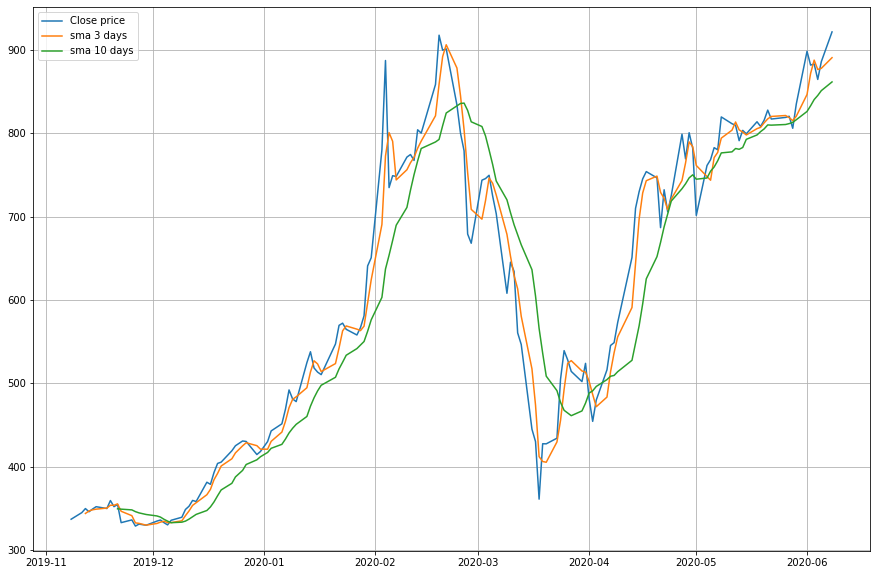

In [34]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma['Close'],label='Close price')
plt.plot(sma['sma_3'],label='sma 3 days')
plt.plot(sma['sma_10'],label='sma 10 days')
plt.legend(loc=2)